In [105]:
import pickle
import networkx as nx
import logging
import matplotlib.pyplot as plt
with open(rf'D:\lateral movement\lateral movement\new\network-and-credentials-simulated\result\Enterprise_graph\AD2.pickle', 'rb') as f:
    G = pickle.load(f)

In [22]:
degreee_of_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)

In [23]:
degreee_of_nodes[1]

('Comp206546', 38)

In [19]:
for i,mach in enumerate(degreee_of_nodes):
    logging.info(f"{mach}")

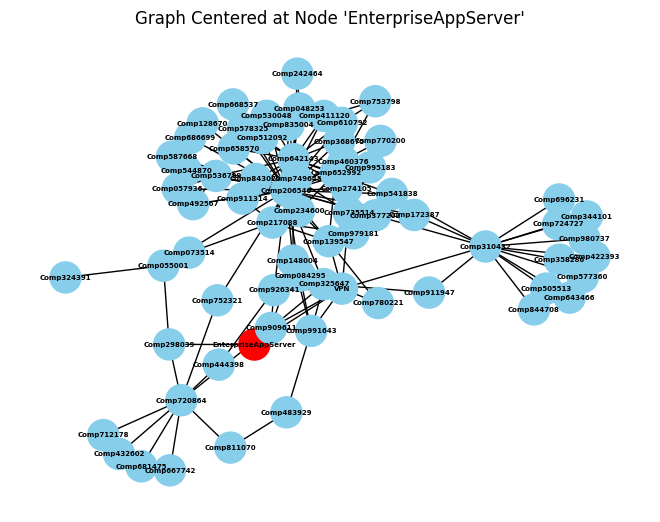

In [111]:
# pos = nx.spring_layout(G)  
# nx.draw(G, pos, with_labels=False, node_size=100, node_color='lightblue')  # 繪製圖形
# nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=3, font_color='darkblue')  # 標註標籤
center_node = 'EnterpriseAppServer'
subgraph = nx.ego_graph(G, center_node, radius=4)  # 选择半径为1的子图

# 绘制图形
pos = nx.spring_layout(subgraph)  # 设置节点布局

# 创建节点颜色列表，中心节点为不同颜色
node_colors = ['skyblue' if node != center_node else 'red' for node in subgraph.nodes()]

nx.draw(subgraph, pos, with_labels=True, node_size=500, node_color=node_colors, font_size=5, font_color='black', font_weight='bold')
plt.title(f"Graph Centered at Node '{center_node}'")
plt.show()


In [5]:
len(G.nodes())

102

In [15]:
single_edge_nodes = [node for node in G.nodes() if len(G.edges(node)) == 1]
single_edge_nodes

['Comp933307',
 'Comp749493',
 'Comp073202',
 'Comp167392',
 'Comp044772',
 'Comp819353',
 'Comp296454',
 'Comp324304',
 'Comp623258',
 'Comp431655',
 'Comp603732',
 'Comp953804',
 'Comp844043',
 'Comp601372',
 'Comp453311',
 'Comp375485',
 'IP590409',
 'Comp431627',
 'Comp355169',
 'Comp073514',
 'Comp345872',
 'Comp172063',
 'Comp667742',
 'Comp247429',
 'Comp324391',
 'Comp611401',
 'Comp908762',
 'Comp681475',
 'Comp712178',
 'Comp896655',
 'Comp432602',
 'Comp591922',
 'Comp735364',
 'Comp344101',
 'Comp844708',
 'Comp643466',
 'Comp577360',
 'Comp696231',
 'Comp724727',
 'Comp980737',
 'Comp422393',
 'Comp505513',
 'Comp358286']

In [16]:
three_hop_nodes = [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==1]
three_hop_nodes,len(three_hop_nodes)

(['VPN',
  'Comp298039',
  'Comp933307',
  'Comp668537',
  'Comp749493',
  'Comp217088',
  'Comp658570',
  'Comp530048',
  'Comp652992',
  'Comp073202',
  'Comp167392',
  'Comp843020',
  'Comp512092',
  'Comp206546',
  'Comp544870',
  'Comp044772',
  'Comp819353',
  'Comp835004',
  'Comp296454',
  'Comp780221',
  'Comp324304',
  'Comp623258',
  'Comp431655',
  'Comp603732',
  'Comp048868',
  'Comp536789',
  'Comp139547',
  'Comp953804',
  'Comp844043',
  'Comp601372',
  'Comp911314',
  'Comp610792',
  'Comp587668',
  'Comp578325',
  'Comp453311',
  'Comp642143',
  'Comp048253',
  'Comp274105',
  'Comp128670',
  'Comp375485',
  'IP590409',
  'Comp492567'],
 42)

In [106]:
with open(rf'D:\lateral movement\lateral movement\new\network-and-credentials-simulated\result\Enterprise_graph\freq_count.pickle', 'rb') as f:
    hop = pickle.load(f)

In [107]:
logging.info(hop)

In [108]:
nei_list=[]
for n in list(G.neighbors('EnterpriseAppServer')):
    if hop[f'target_{n}_count'] != 0:
        nei_list.append(n)


In [109]:
for n in [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==1]:
    if n not in nei_list:
        G.remove_edge(n,'EnterpriseAppServer')

In [110]:
hop_1 = [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==1]
hop_2 = [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==2]
hop_3 = [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==3]
hop_4 = [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==4]

In [128]:
hop_2 = [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==7]
len(hop_2)

0

In [112]:
for n in list(G.nodes()):
    if n in hop_1:
        if len(list(G.neighbors(n))) == 1:
            G.remove_node(n)

In [113]:
G.remove_node('VPN')

In [78]:
for n in list(G.neighbors('EnterpriseAppServer')):
    if n != 'Comp217088':
        if n!= 'Comp206546':
            G.remove_edge(n,'EnterpriseAppServer')
            print(n)

Comp298039
Comp668537
Comp658570
Comp530048
Comp652992
Comp843020
Comp512092
Comp544870
Comp835004
Comp780221
Comp048868
Comp536789
Comp139547


In [114]:
logging.basicConfig(filename='output.log', level=logging.DEBUG, format='%(message)s')
nodess = [node for node, distance in nx.single_source_shortest_path_length(G, 'EnterpriseAppServer').items() if distance==1]
node_neighbors = {node: len(list(G.neighbors(node))) for node in nodess}
sorted_nodes = sorted(node_neighbors.keys(), key=lambda x: node_neighbors[x])


In [115]:
dic = {}
for n in sorted_nodes:
    dic[f'{n}'] = set()
    neighbors = [j for j in G.neighbors((n))]
    for nei in neighbors:
        if nei in hop_1:
            if len(list(G.neighbors(n)))>len(list(G.neighbors(nei))) and G.has_edge(nei,'EnterpriseAppServer'):
                    G.remove_edge(nei,'EnterpriseAppServer')
            if len(list(G.neighbors(nei)))>len(list(G.neighbors(n))) and G.has_edge(n,'EnterpriseAppServer'):
                    G.remove_edge(n,'EnterpriseAppServer')
            dic[f'{n}'].update({nei})
G.remove_edge('Comp206546','EnterpriseAppServer')

In [123]:
list(G.neighbors('EnterpriseAppServer'))

['Comp298039', 'Comp048868']

In [122]:
list(G.neighbors('Comp298039'))

['EnterpriseAppServer', 'Comp055001', 'Comp720864']

In [39]:
logging.info(list(G.neighbors('Comp298039'))),
logging.info(list(G.neighbors('Comp206546'))),
logging.info(list(G.neighbors('Comp048868'))),
logging.info(list(G.neighbors('Comp642143'))),

(None,)

In [71]:
for n in list(G.nodes()):
    if len(list(G.neighbors(n))) == 0:
        print(n)

In [103]:
def find_duplicates(arr1, arr2):
    set1 = set(arr1)
    set2 = set(arr2)
    common_elements = set1.intersection(set2)
    return list(common_elements)
find_duplicates(hop_1,hop_2)

[]

In [69]:
logging.basicConfig(filename='output.log', level=logging.DEBUG, format='%(message)s')
logging.info(f"____________________________________________________")
for i in dic.items():
    logging.info(f"{i[0]}:{i[1]}")
logging.info(f"____________________________________________________")

In [5]:
import logging
import pickle
logging.basicConfig(filename='output.log', level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')
with open(rf'C:\Users\jerry\OneDrive\PSU meeting\state_artibut\LogHost.pickle', 'rb') as f:
    Loghost = pickle.load(f)
    for l in Loghost:
        if l[0:4]!= 'Comp':
            logging.info(f"{l}")
    logging.info(f"____________________________________________________")

In [47]:
with open(f'set_target_as_enterprise_v3.gpickle', 'wb') as f:
    pickle.dump(G, f, pickle.HIGHEST_PROTOCOL)

In [1]:
len(G.nodes())

NameError: name 'G' is not defined

In [ ]:
aaa